In [1]:
import pandas as pd
d90_99=pd.read_csv(r"C:\Users\Akshaya\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
d00_12=pd.read_csv(r"C:\Users\Akshaya\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
d12_14=pd.read_csv(r"C:\Users\Akshaya\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
d15_16=pd.read_csv(r"C:\Users\Akshaya\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
d17=pd.read_csv(r"C:\Users\Akshaya\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [2]:
print(d90_99.columns)
print(d00_12.columns)
print(d12_14.columns)
print(d15_16.columns)
print(d17.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [3]:
print(d90_99.shape)
print(d00_12.shape)
print(d12_14.shape)
print(d15_16.shape)
print(d17.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(180962, 11)


In [4]:
j=[d90_99,d00_12,d12_14,d15_16,d17]
data=pd.concat(j)
print(data.shape)

(927165, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927165 entries, 0 to 180961
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927165 non-null  object 
 1   town                 927165 non-null  object 
 2   flat_type            927165 non-null  object 
 3   block                927165 non-null  object 
 4   street_name          927165 non-null  object 
 5   storey_range         927165 non-null  object 
 6   floor_area_sqm       927165 non-null  float64
 7   flat_model           927165 non-null  object 
 8   lease_commence_date  927165 non-null  int64  
 9   resale_price         927165 non-null  float64
 10  remaining_lease      218115 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.9+ MB


In [6]:
data=data.drop(columns=['remaining_lease'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927165 entries, 0 to 180961
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927165 non-null  object 
 1   town                 927165 non-null  object 
 2   flat_type            927165 non-null  object 
 3   block                927165 non-null  object 
 4   street_name          927165 non-null  object 
 5   storey_range         927165 non-null  object 
 6   floor_area_sqm       927165 non-null  float64
 7   flat_model           927165 non-null  object 
 8   lease_commence_date  927165 non-null  int64  
 9   resale_price         927165 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 77.8+ MB


In [8]:
from sklearn import preprocessing
label_encoders = {}
cols = ['month','town','flat_type','block','street_name','storey_range','flat_model','lease_commence_date']
# Encode labels of multiple columns at once



label_encoders = {}

# Encode labels of multiple columns and store the encoders
for col in cols:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Print head
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,0,0,0,830,13,5,31.0,7,11,9000.0
1,0,0,0,830,13,2,31.0,7,11,6000.0
2,0,0,0,830,13,5,31.0,7,11,8000.0
3,0,0,0,830,13,4,31.0,7,11,6000.0
4,0,0,2,447,13,2,73.0,20,10,47200.0


In [22]:
import pickle
with open('label_encoders1.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

<Axes: >

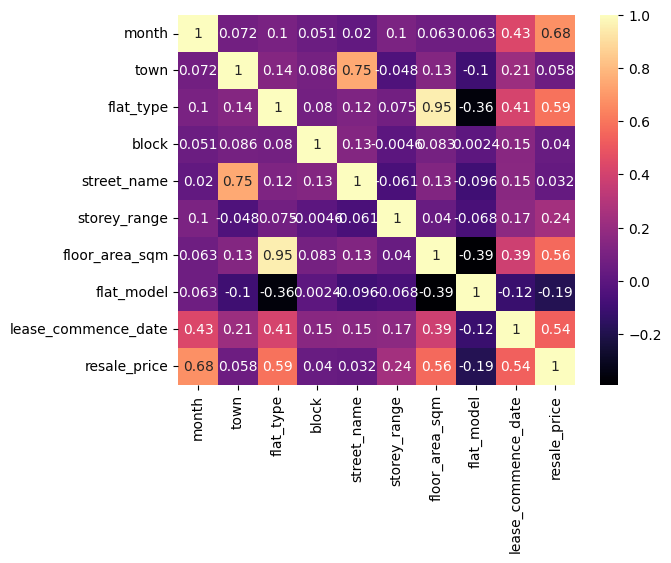

In [10]:
import seaborn as sns
x=data[['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price']].corr()
sns.heatmap(x, annot=True, cmap="magma")

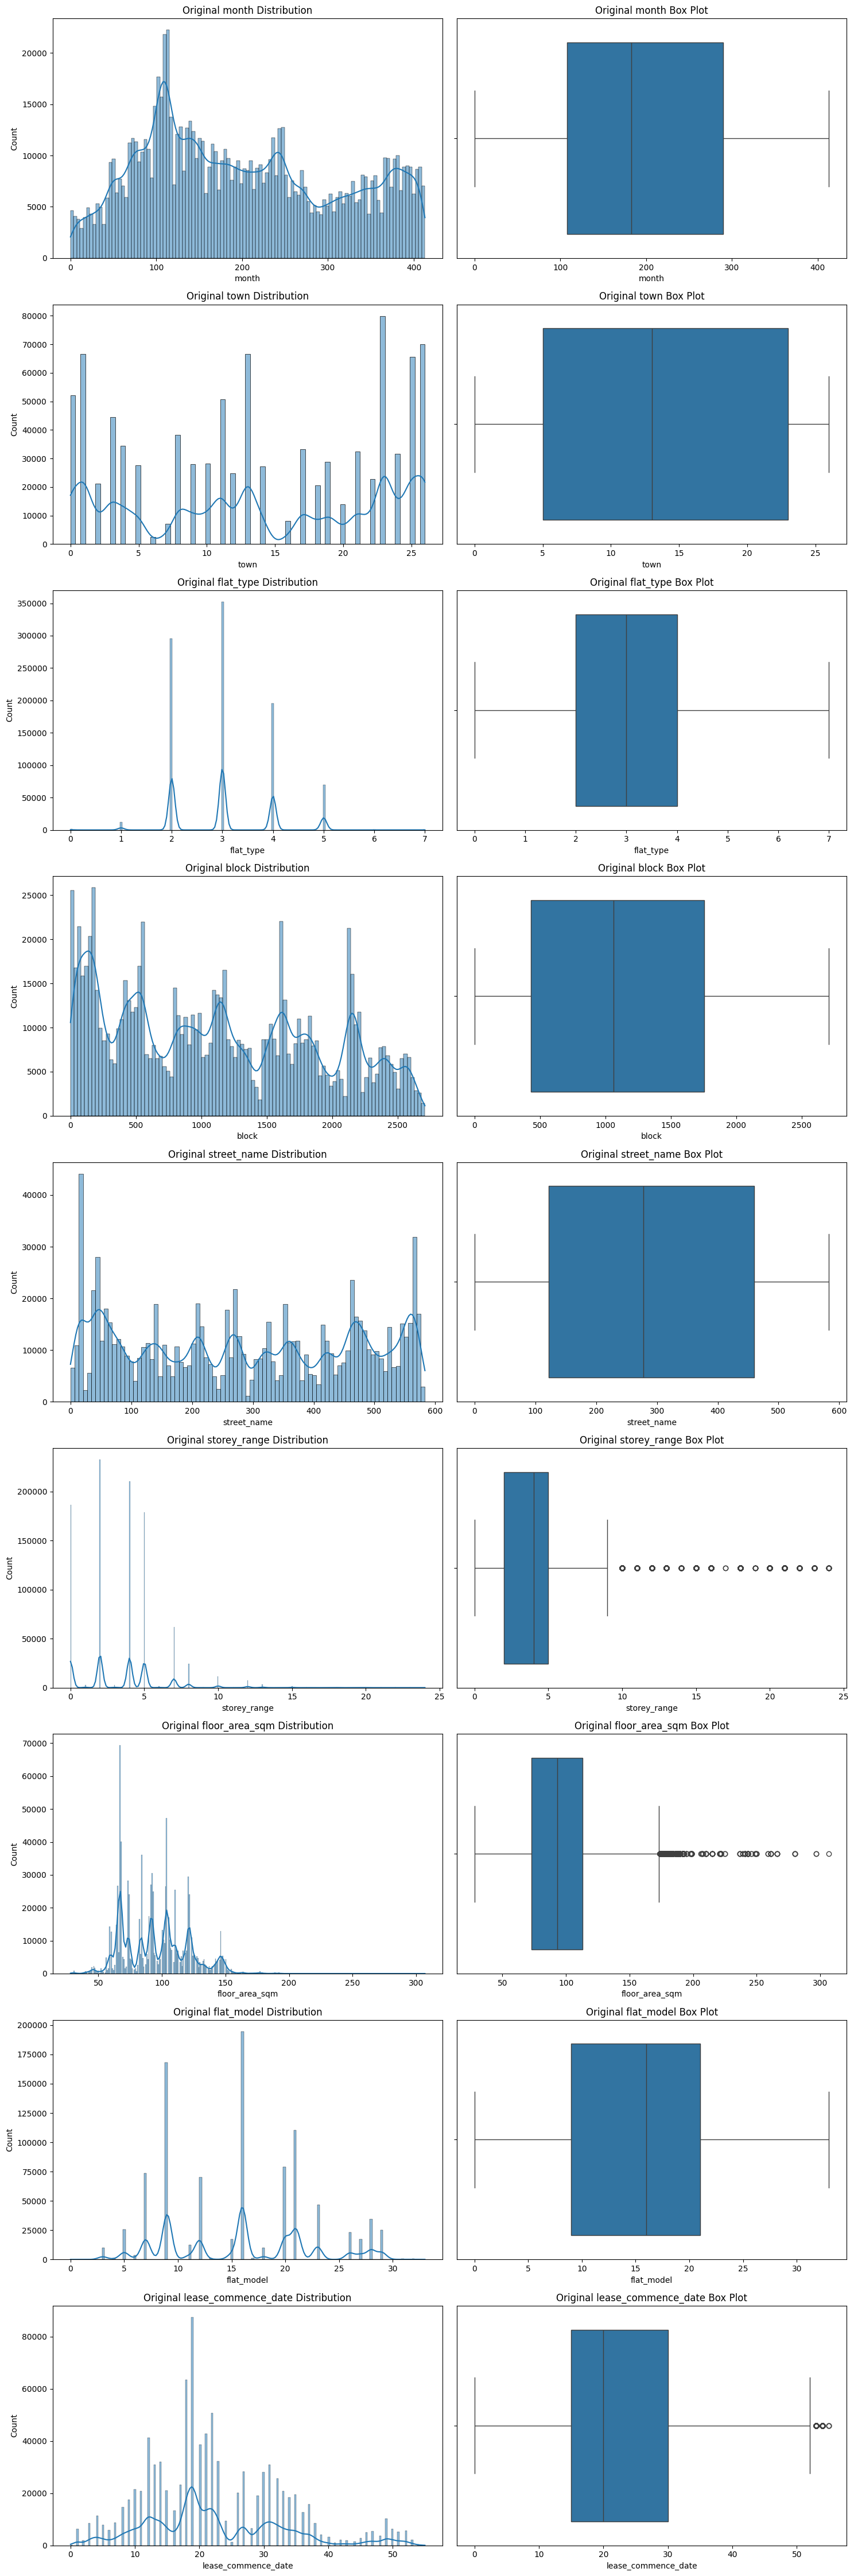

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('resale_price')
# Plotting original data distributions
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(15, len(numeric_features) * 5))

for i, feature in enumerate(numeric_features):
    # Original data
    sns.histplot(data[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Original {feature} Distribution')
    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Original {feature} Box Plot')

plt.tight_layout()
plt.show()

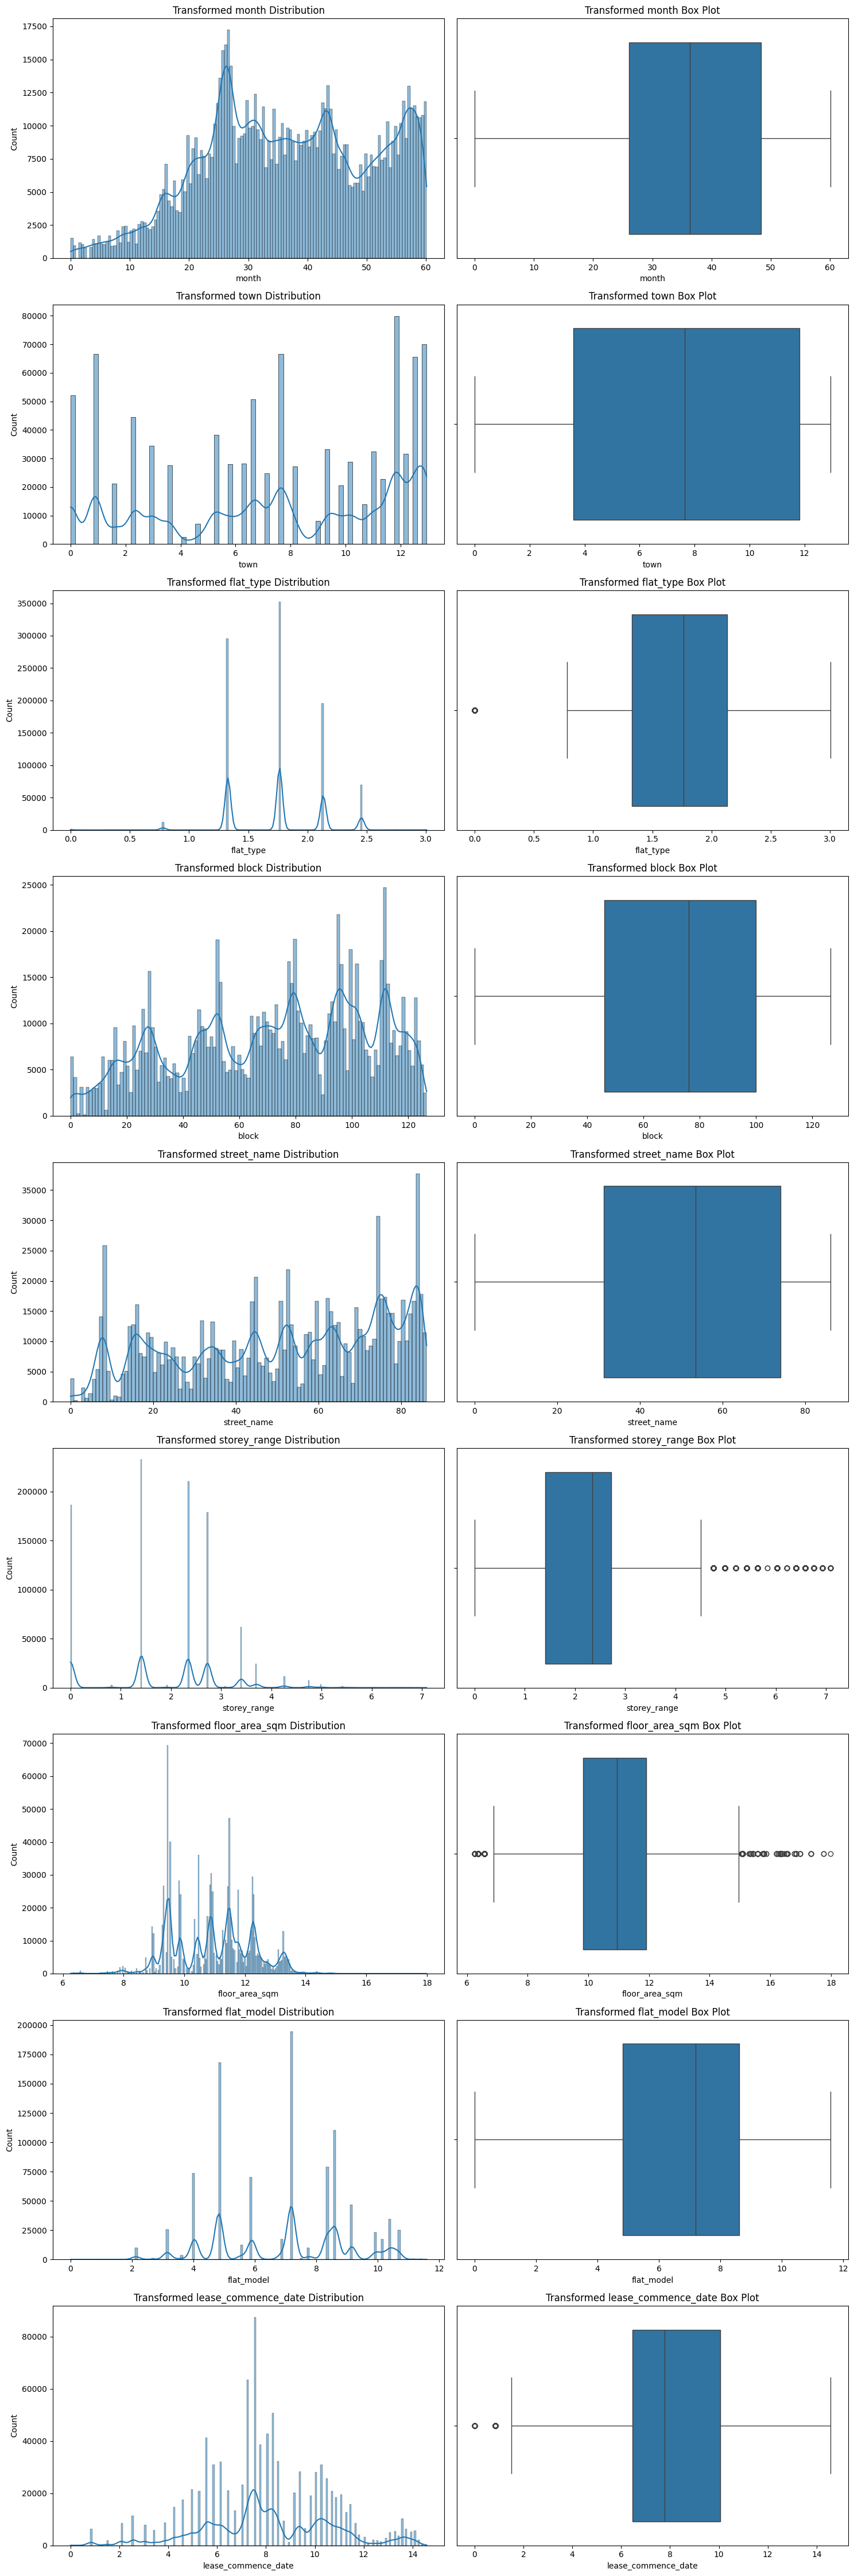

In [12]:
from scipy.stats import boxcox
boxcox_lambdas = {}
for feature in numeric_features:
    if any(data[feature] <= 0):  # Check for non-positive values
        data[feature] = data[feature] - data[feature].min() + 1  # Shift data to make it positive
    data[feature], fitted_lambda = boxcox(data[feature])
    boxcox_lambdas[feature] = fitted_lambda

# Plotting transformed data distributions
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(15, len(numeric_features) * 5))

for i, feature in enumerate(numeric_features):
    # Transformed data
    sns.histplot(data[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Transformed {feature} Distribution')
    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Transformed {feature} Box Plot')

plt.tight_layout()
plt.show()

In [13]:
x=data[['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date']].values
y=data['resale_price']

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])


X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [16]:
import pickle

# Save the pipeline
with open('pipeline1.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
model1=RandomForestRegressor(n_estimators=100, random_state=42,max_depth=20, min_samples_leaf=2,min_samples_split=10).fit(X_train,y_train)
y_pred=model1.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

Mean Absolute Error: 16100.474967816079
Mean Squared Error: 609595101.0948185
Root Mean Squared Error: 24689.979771049195
R² score: 0.9790735499741275


In [18]:
new_sample = {
    'month': '2024-06',
    'town': 'YISHUN',
    'flat_type': '4 ROOM',
    'block': '758',
    'street_name': 'YISHUN ST 72',
    'storey_range': '10 TO 12',
    'floor_are_sqm': 84,
    'lease_commence_date': '1986',
    'flat_model': 'Simplified',
}


new_data_df = pd.DataFrame([new_sample])

# Encode the categorical features using the label encoders
for col in cols:
    new_data_df[col] = label_encoders[col].transform(new_data_df[col])

# Scale the new data point using the same scaler
new_data_scaled = pipeline.transform(new_data_df)
new_pred = model1.predict(new_data_scaled)
# Predict using the trained model
#new_pred = inv_boxcox(new_pred_transformed, boxcox_lambdas['resale_price'])

print("Prediction for the new data point:", new_pred[0])

Prediction for the new data point: 1048850.6634974692


c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [19]:
import pickle
with open("singaporerf.pkl","wb") as files:
    pickle.dump(model1, files)

In [20]:
import pickle
with open("singaporerf.pkl","rb") as files:
    model=pickle.load(files)

In [21]:
new_sample = {
    'month': '2024-06',
    'town': 'YISHUN',
    'flat_type': '4 ROOM',
    'block': '758',
    'street_name': 'YISHUN ST 72',
    'storey_range': '10 TO 12',
    'floor_are_sqm': 84,
    'lease_commence_date': '1986',
    'flat_model': 'Simplified',
}


new_data_df = pd.DataFrame([new_sample])

# Encode the categorical features using the label encoders
for col in cols:
    new_data_df[col] = label_encoders[col].transform(new_data_df[col])

# Scale the new data point using the same scaler
new_data_scaled = pipeline.transform(new_data_df)
new_pred = model.predict(new_data_scaled)
# Predict using the trained model
#new_pred = inv_boxcox(new_pred_transformed, boxcox_lambdas['resale_price'])

print("Prediction for the new data point:", new_pred[0])

Prediction for the new data point: 1048850.6634974692


c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [24]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.1/99.8 MB 297.7 kB/s eta 0:05:35
   ---------------------------------------- 0.1/99.8 MB 374.1 kB/s eta 0:04:27
   ---------------------------------------- 0.1/99.8 MB 400.9 kB/s eta 0:04:09
   ---------------------------------------- 0.2/99.8 MB 562.0 kB/s eta 0:02:58
   ---------------------------------------- 0.2/99.8 MB 562.0 kB/s eta 0:02:58
   ---------------------------------------- 0.3/99.8 MB 582.4 kB/s eta 0:02:51
   ---------------------------------------- 0.3/99.8 MB 610.3 kB/s eta 0:02:43
   ---------------------------------------- 0.3/99.8 MB 540.0 kB/s eta 0:03:05
   ------

In [25]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are already defined

# Define the XGBoost regressor model
model1 = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=20,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.1,
    random_state=42
)

# Fit the model
model1.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model1.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)


Mean Absolute Error: 13750.663463979303
Mean Squared Error: 410188651.28551424
Root Mean Squared Error: 20253.11460703055
R² score: 0.9859188627059338


In [26]:
import pickle
with open("singaporexgb.pkl","wb") as files:
    pickle.dump(model1, files)

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, and y_test are already defined

# Define the Decision Tree Regressor model
model1 = DecisionTreeRegressor(
    max_depth=20, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    random_state=42
)

# Fit the model
model1.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model1.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

Mean Absolute Error: 18817.290903583194
Mean Squared Error: 875152323.4192262
Root Mean Squared Error: 29582.973539169896
R² score: 0.9699573842897239


In [28]:
import pickle
with open("singaporedt.pkl","wb") as files:
    pickle.dump(model1, files)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score

# Define the Gradient Boosting Regressor model
model1 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    random_state=42
)

# Fit the model
model1.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model1.predict(X_test)

# Calculate and print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

Mean Absolute Error: 14635.791312754387
Mean Squared Error: 497086203.7961306
Root Mean Squared Error: 22295.43011013985
R² score: 0.9829358051211236


In [30]:
import pickle
with open("singaporegb.pkl","wb") as files:
    pickle.dump(model1, files)